<a href="https://colab.research.google.com/github/Leonardorochagit/Geracao_Energia/blob/main/Previsao_GeracaoEnergia_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Universidade do Estado do Amazonas**</center>
###  <center>Escola Superior de Tecnologia</center>
#####  <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
#####  <center>Programação para Ciência de Dados (Turma 02)</center>
---
## <center>Trabalho de Conclusão de Curso </center>
##### <center>Orientadora: <a href="Alice Dativa /" target="_blank">Msc. Alice Adativa</a></center>
###### <center> Orientado: Leonardo Rocha </center>
#<center>**Tema: Análise da Geração de Energia no Municipio de Manaus e a Projeção Futura de para atendimento ao Mercado Cosumidor**</center>

## **ETAPA 1: Importação das Bibliotecas e Configurações Ambiente**



In [7]:
!pip install pmdarima

  Using cached pmdarima-1.8.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.4 MB)
  Using cached statsmodels-0.13.2.tar.gz (17.9 MB)
ERROR: Operation cancelled by user
  Installing build dependencies ... 

In [2]:
#  !pip install sweetviz -q
#  !pip install -U pandas-profiling
#  !pip install --user -q datascience

In [11]:
import numpy as np
import pandas as pd
from pandas import Grouper 
from pandas import DataFrame
from datetime import datetime

#ARIMA

#from pmdarima.arima import auto_arima
#Stats Models 
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

#Graficos 
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

from matplotlib import pyplot
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")
import warnings; warnings.filterwarnings(action='once')

#plt.rcParams["figure.figsize"] = (15,15)
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.style.use('seaborn')
sns.set()
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Blues_r")

# style -> white, dark, whitegrid, darkgrid, ticks
#sns.set_style("darkgrid")

In [10]:
pd.options.display.max_columns = None

In [13]:
! git clone https://github.com/Leonardorochagit/Geracao_Energia
%cd /content/Geracao_Energia/Base_ONS

Cloning into 'Geracao_Energia'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 111 (delta 53), reused 35 (delta 13), pack-reused 0
Receiving objects: 100% (111/111), 44.17 MiB | 11.64 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Checking out files: 100% (41/41), done.
/content/Geracao_Energia/Base_ONS


## **ETAPA 2: Leitura do Dataset e Criação de Dataframes**

In [73]:
# lendo o dataset e criando um dataframe de series temporais 
df_original = pd.read_csv('/content/Geracao_Energia/Base_ONS/4. Simples_Geração_de_Energia_Dia_data AMAZONAS.csv', sep = ';', 
                 index_col=0, header=0, parse_dates=True, squeeze=True) # header=0, index_col=0, parse_dates=True, squeeze=True
df_original.head()    

,cod_aneel (tb_referenciacegusina (Usina)),cod_nucleoaneel (tb_referenciacegusina (Usina)),Data Dica,dsc_estado,id_subsistema,nom_tipousinasite,nom_usina2,Período Exibido GE,Selecione Tipo de GE Simp 4
Data Escala de Tempo 1 GE Simp 4,,,,,,,,,
2013-09-07 00:00:00,*,*,9/7/2013 0:00,AMAZONAS,Norte,*,*,5,"0,56682"
2013-09-07 01:00:00,*,*,9/7/2013 1:00,AMAZONAS,Norte,*,*,5,"0,73739"
2013-09-07 02:00:00,*,*,9/7/2013 2:00,AMAZONAS,Norte,*,*,5,"0,74197"
2013-09-07 03:00:00,*,*,9/7/2013 3:00,AMAZONAS,Norte,*,*,5,"0,73323"
2013-09-07 04:00:00,*,*,9/7/2013 4:00,AMAZONAS,Norte,*,*,5,"0,79895"


In [70]:
df_original.columns


Index(['cod_aneel (tb_referenciacegusina (Usina))',
       'cod_nucleoaneel (tb_referenciacegusina (Usina))', 'Data Dica',
       'dsc_estado', 'id_subsistema', 'nom_tipousinasite', 'nom_usina2',
       'Período Exibido GE', 'Selecione Tipo de GE Simp 4'],
      dtype='object')

In [74]:
lista_colunas_drop = ['cod_aneel (tb_referenciacegusina (Usina))', 'cod_nucleoaneel (tb_referenciacegusina (Usina))', 
                      'Data Dica','dsc_estado', 'id_subsistema', 'nom_tipousinasite', 'nom_usina2', 
                      'Período Exibido GE']
df=df_original.drop(columns=lista_colunas_drop)
df = df.rename(columns={'Data Escala de Tempo 1 GE Simp 4':'Data/Hora','Selecione Tipo de GE Simp 4':'geracao'})
df

,geracao
Data Escala de Tempo 1 GE Simp 4,
2013-09-07 00:00:00,"0,56682"
2013-09-07 01:00:00,"0,73739"
2013-09-07 02:00:00,"0,74197"
2013-09-07 03:00:00,"0,73323"
2013-09-07 04:00:00,"0,79895"
...,...
2022-01-17 19:00:00,"0,741464"
2022-01-17 20:00:00,"0,740971"
2022-01-17 21:00:00,"0,74189"


In [76]:
df.isna().sum()

geracao    0
dtype: int64

In [78]:
df.index.names = ['Data/Hora']
df['geracao']=df['geracao'].apply(lambda x: str(x).replace(',','.'))
df['geracao']=df['geracao'].astype('float64')


In [79]:
df['year'] = df.index.year
df['month']  = df.index.month
df['weekday'] = df.index.weekday
df['weekofyear'] = df.index.weekofyear
df['quarter'] = df.index.quarter
df.tail(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



,geracao,year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2022-01-17 21:00:00,0.741890,2022,1,0,3,1
2022-01-17 22:00:00,0.739852,2022,1,0,3,1
2022-01-17 23:00:00,0.740491,2022,1,0,3,1


In [80]:
df.describe()

,geracao,year,month,weekday,weekofyear,quarter
count,74514.000000,74514.000000,74514.000000,74514.000000,74514.000000,74514.000000
mean,0.858840,2017.275505,6.622997,2.998846,27.060056,2.542261
std,0.217121,2.477456,3.452365,1.999537,15.109199,1.117651
min,0.023331,2013.000000,1.000000,0.000000,1.000000,1.000000
25%,0.695722,2015.000000,4.000000,1.000000,14.000000,2.000000
50%,0.859378,2017.000000,7.000000,3.000000,28.000000,3.000000
75%,1.027196,2019.000000,10.000000,5.000000,40.000000,4.000000
max,1.296660,2022.000000,12.000000,6.000000,53.000000,4.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74514 entries, 2013-09-07 00:00:00 to 2022-01-17 23:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   geracao     74514 non-null  float64
 1   year        74514 non-null  int64  
 2   month       74514 non-null  int64  
 3   weekday     74514 non-null  int64  
 4   weekofyear  74514 non-null  int64  
 5   quarter     74514 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.0 MB


In [82]:
df.index

DatetimeIndex(['2013-09-07 00:00:00', '2013-09-07 01:00:00',
               '2013-09-07 02:00:00', '2013-09-07 03:00:00',
               '2013-09-07 04:00:00', '2013-09-07 05:00:00',
               '2013-09-07 06:00:00', '2013-09-07 07:00:00',
               '2013-09-07 08:00:00', '2013-09-07 09:00:00',
               ...
               '2022-01-17 14:00:00', '2022-01-17 15:00:00',
               '2022-01-17 16:00:00', '2022-01-17 17:00:00',
               '2022-01-17 18:00:00', '2022-01-17 19:00:00',
               '2022-01-17 20:00:00', '2022-01-17 21:00:00',
               '2022-01-17 22:00:00', '2022-01-17 23:00:00'],
              dtype='datetime64[ns]', name='Data/Hora', length=74514, freq=None)

In [83]:
df.isna().sum()

geracao       0
year          0
month         0
weekday       0
weekofyear    0
quarter       0
dtype: int64

In [84]:
df3 = df.iloc[:,0:2]
df3

,geracao,year
Data/Hora,,
2013-09-07 00:00:00,0.566820,2013
2013-09-07 01:00:00,0.737390,2013
2013-09-07 02:00:00,0.741970,2013
2013-09-07 03:00:00,0.733230,2013
2013-09-07 04:00:00,0.798950,2013
...,...,...
2022-01-17 19:00:00,0.741464,2022
2022-01-17 20:00:00,0.740971,2022
2022-01-17 21:00:00,0.741890,2022


In [85]:
df_ano = df3.set_index('year')
df_ano

,geracao
year,
2013,0.566820
2013,0.737390
2013,0.741970
2013,0.733230
2013,0.798950
...,...
2022,0.741464
2022,0.740971
2022,0.741890


In [86]:
df = df.loc['2013-01-01':'2021-12-31']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,geracao,year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2013-09-07 00:00:00,0.566820,2013,9,5,36,3
2013-09-07 01:00:00,0.737390,2013,9,5,36,3
2013-09-07 02:00:00,0.741970,2013,9,5,36,3
2013-09-07 03:00:00,0.733230,2013,9,5,36,3
2013-09-07 04:00:00,0.798950,2013,9,5,36,3
...,...,...,...,...,...,...
2021-12-31 19:00:00,0.927197,2021,12,4,52,4
2021-12-31 20:00:00,0.928275,2021,12,4,52,4
2021-12-31 21:00:00,0.924679,2021,12,4,52,4


In [87]:
df8=df.copy()
df8['date']=df8.index.normalize()
df8['time']=df8.index.time.astype(str)
df8.head()

,geracao,year,month,weekday,weekofyear,quarter,date,time
Data/Hora,,,,,,,,
2013-09-07 00:00:00,0.56682,2013,9,5,36,3,2013-09-07,00:00:00
2013-09-07 01:00:00,0.73739,2013,9,5,36,3,2013-09-07,01:00:00
2013-09-07 02:00:00,0.74197,2013,9,5,36,3,2013-09-07,02:00:00
2013-09-07 03:00:00,0.73323,2013,9,5,36,3,2013-09-07,03:00:00
2013-09-07 04:00:00,0.79895,2013,9,5,36,3,2013-09-07,04:00:00


In [88]:
del df8['year']
del df8['month']
del df8['weekday']
del df8['weekofyear']
del df8['quarter']
df8

,geracao,date,time
Data/Hora,,,
2013-09-07 00:00:00,0.566820,2013-09-07,00:00:00
2013-09-07 01:00:00,0.737390,2013-09-07,01:00:00
2013-09-07 02:00:00,0.741970,2013-09-07,02:00:00
2013-09-07 03:00:00,0.733230,2013-09-07,03:00:00
2013-09-07 04:00:00,0.798950,2013-09-07,04:00:00
...,...,...,...
2021-12-31 19:00:00,0.927197,2021-12-31,19:00:00
2021-12-31 20:00:00,0.928275,2021-12-31,20:00:00
2021-12-31 21:00:00,0.924679,2021-12-31,21:00:00


In [90]:
df_pivot=df8.pivot(index='date', columns ='time', values='geracao')
df_pivot


time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-08,1.043050,1.007990,0.956080,0.925520,0.890290,0.869180,0.834700,0.777050,0.819490,0.914260,0.960300,0.996930,0.994100,1.019690,1.053670,1.057140,1.055030,1.057560,1.015780,1.022700,1.058350,1.065040,1.064010,1.056990
2013-01-09,0.940450,0.910590,0.876000,0.861970,0.814690,0.817140,0.763990,0.728110,0.718460,0.723110,0.711170,0.720230,0.726780,0.722030,0.734640,0.776590,0.800250,0.823050,0.877910,0.956820,0.994940,0.993970,1.001900,0.996580
2013-01-10,0.962540,0.923770,0.896280,0.887340,0.871520,0.858400,0.834740,0.768070,0.829180,0.906050,0.959630,0.982730,1.001300,1.035480,1.103200,1.161520,1.161150,1.139590,1.030670,1.076940,1.119150,1.122390,1.123640,1.124790
2013-01-11,1.094580,1.072280,1.020000,0.992110,0.965630,0.949650,0.905420,0.882490,0.834670,0.909220,0.954540,0.949980,0.934060,0.875310,0.871640,0.895860,0.934170,0.906930,0.890880,0.891900,0.978240,1.002010,0.988650,0.978110
2013-01-12,0.994950,0.994190,0.974870,0.942400,0.921110,0.883130,0.886940,0.857920,0.787770,0.777730,0.761700,0.747380,0.728480,0.728030,0.742940,0.747450,0.744270,0.788890,0.813400,0.805820,0.876420,0.921710,0.964660,0.960080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.906238,0.907297,0.906733,0.903555,0.905763,0.903367,0.902981,0.903861,0.906968,0.907458,0.902973,0.905853,0.906238,0.906296,0.906176,0.906012,0.904920,0.904816,0.905875,0.907263,0.907904,0.910224,0.907158,0.906783
2021-12-28,0.805133,0.742800,0.745253,0.745245,0.744954,0.744653,0.744836,0.728560,0.727245,0.723015,0.711493,0.714734,0.714273,0.712600,0.712939,0.715947,0.713949,0.711471,0.713240,0.713303,0.705839,0.708913,0.709326,0.709159
2021-12-29,0.712618,0.712193,0.711240,0.711910,0.713838,0.710028,0.696018,0.695558,0.696217,0.696322,0.696064,0.696941,0.695750,0.695795,0.695782,0.695196,0.693316,0.711416,0.711109,0.708635,0.710258,0.727719,0.729055,0.726604


Text(0.5, 1.0, 'Geração de Energia no Amazonas ')

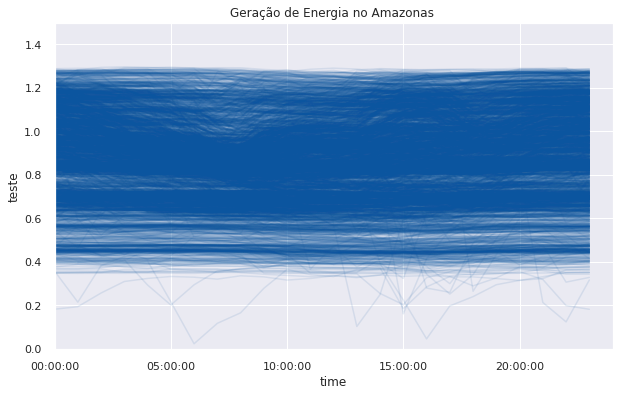

In [91]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
df_pivot.T.plot(ax=ax, color='C0', alpha=0.1, legend=False) # alpha=0.1, 
ax.set_xlim([0,24])
ax.set_ylim(0,1.5)
ax.set_ylabel('teste') #$"C$
ax.set_title('Geração de Energia no Amazonas ')#$ (df):

In [92]:
df_pivot_day=df_pivot.groupby(Grouper(freq='D'))
df_pivot_day.head()

time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-08,1.043050,1.007990,0.956080,0.925520,0.890290,0.869180,0.834700,0.777050,0.819490,0.914260,0.960300,0.996930,0.994100,1.019690,1.053670,1.057140,1.055030,1.057560,1.015780,1.022700,1.058350,1.065040,1.064010,1.056990
2013-01-09,0.940450,0.910590,0.876000,0.861970,0.814690,0.817140,0.763990,0.728110,0.718460,0.723110,0.711170,0.720230,0.726780,0.722030,0.734640,0.776590,0.800250,0.823050,0.877910,0.956820,0.994940,0.993970,1.001900,0.996580
2013-01-10,0.962540,0.923770,0.896280,0.887340,0.871520,0.858400,0.834740,0.768070,0.829180,0.906050,0.959630,0.982730,1.001300,1.035480,1.103200,1.161520,1.161150,1.139590,1.030670,1.076940,1.119150,1.122390,1.123640,1.124790
2013-01-11,1.094580,1.072280,1.020000,0.992110,0.965630,0.949650,0.905420,0.882490,0.834670,0.909220,0.954540,0.949980,0.934060,0.875310,0.871640,0.895860,0.934170,0.906930,0.890880,0.891900,0.978240,1.002010,0.988650,0.978110
2013-01-12,0.994950,0.994190,0.974870,0.942400,0.921110,0.883130,0.886940,0.857920,0.787770,0.777730,0.761700,0.747380,0.728480,0.728030,0.742940,0.747450,0.744270,0.788890,0.813400,0.805820,0.876420,0.921710,0.964660,0.960080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.906238,0.907297,0.906733,0.903555,0.905763,0.903367,0.902981,0.903861,0.906968,0.907458,0.902973,0.905853,0.906238,0.906296,0.906176,0.906012,0.904920,0.904816,0.905875,0.907263,0.907904,0.910224,0.907158,0.906783
2021-12-28,0.805133,0.742800,0.745253,0.745245,0.744954,0.744653,0.744836,0.728560,0.727245,0.723015,0.711493,0.714734,0.714273,0.712600,0.712939,0.715947,0.713949,0.711471,0.713240,0.713303,0.705839,0.708913,0.709326,0.709159
2021-12-29,0.712618,0.712193,0.711240,0.711910,0.713838,0.710028,0.696018,0.695558,0.696217,0.696322,0.696064,0.696941,0.695750,0.695795,0.695782,0.695196,0.693316,0.711416,0.711109,0.708635,0.710258,0.727719,0.729055,0.726604


In [93]:
df

,geracao,year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2013-09-07 00:00:00,0.566820,2013,9,5,36,3
2013-09-07 01:00:00,0.737390,2013,9,5,36,3
2013-09-07 02:00:00,0.741970,2013,9,5,36,3
2013-09-07 03:00:00,0.733230,2013,9,5,36,3
2013-09-07 04:00:00,0.798950,2013,9,5,36,3
...,...,...,...,...,...,...
2021-12-31 19:00:00,0.927197,2021,12,4,52,4
2021-12-31 20:00:00,0.928275,2021,12,4,52,4
2021-12-31 21:00:00,0.924679,2021,12,4,52,4


## **ETAPA 3: Manipulação dos Dataframes e Criação de Gráficos**  

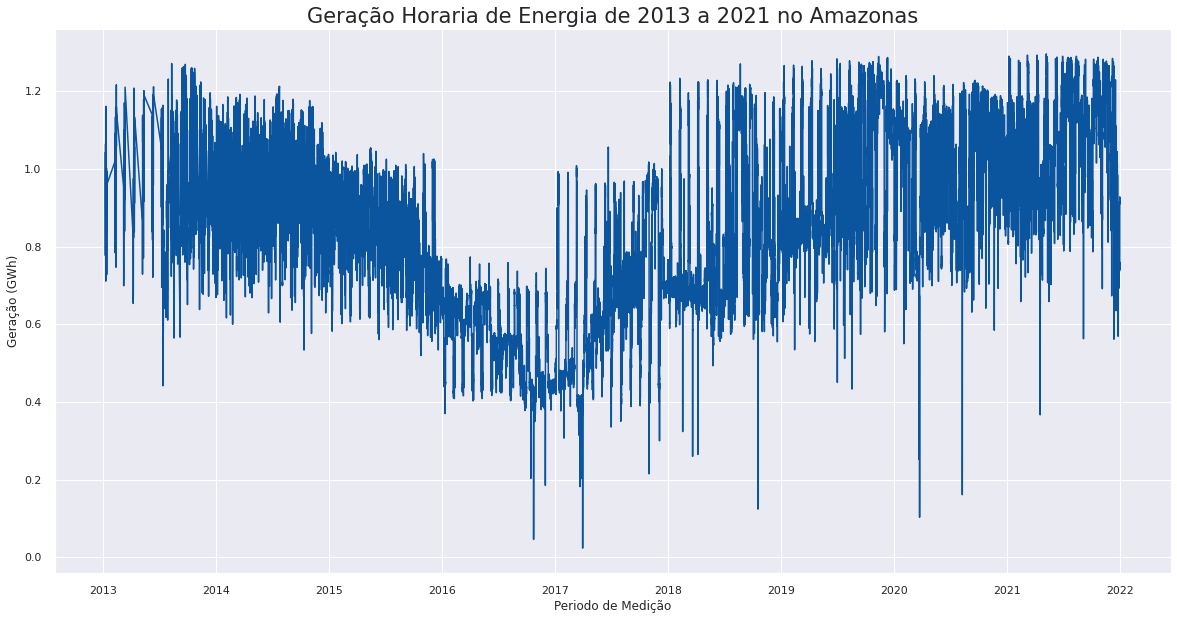

In [95]:
plt.figure(figsize=(20,10))
plt.title("Geração Horaria de Energia de 2013 a 2021 no Amazonas", loc="center", fontsize=21)
plt.xlabel("Periodo de Medição")
plt.ylabel("Geração (GWh)")
sns.lineplot(x=df.index, y='geracao', data=df)
plt.show()

In [96]:
df

,geracao,year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2013-09-07 00:00:00,0.566820,2013,9,5,36,3
2013-09-07 01:00:00,0.737390,2013,9,5,36,3
2013-09-07 02:00:00,0.741970,2013,9,5,36,3
2013-09-07 03:00:00,0.733230,2013,9,5,36,3
2013-09-07 04:00:00,0.798950,2013,9,5,36,3
...,...,...,...,...,...,...
2021-12-31 19:00:00,0.927197,2021,12,4,52,4
2021-12-31 20:00:00,0.928275,2021,12,4,52,4
2021-12-31 21:00:00,0.924679,2021,12,4,52,4


In [97]:
df_mes=df8
df_mes['Data']=df8.index
#del df_mes.index

In [98]:
df_mes=df8.reset_index()
df_mes = df_mes.groupby(pd.Grouper(key='Data', freq='M')).sum()
df_mes.head(3)


,geracao
Data,
2013-01-31,110.41691
2013-02-28,117.02680
2013-03-31,115.38102


In [99]:
df_mes.isnull().sum()

geracao    0
dtype: int64

In [100]:
df_mes.isna().sum()

geracao    0
dtype: int64

In [109]:
df_day=df8.reset_index()
df_mes = df_mes.groupby(pd.Grouper(key='Data', freq='M')).sum()
df_mes.head(3)


Data/Hora
2013-09-07 00:00:00    0.56682
2013-09-07 01:00:00    0.73739
2013-09-07 02:00:00    0.74197
2013-09-07 03:00:00    0.73323
2013-09-07 04:00:00    0.79895
Name: geracao, dtype: float64

In [115]:
df_day=df['geracao']
df_day=df_day.reset_index()
df_day = df_day.set_index(['Data/Hora']) 
#df_day = pd.to_datetime(Data/Hora.index) 
df_day.head()

,geracao
Data/Hora,
2013-09-07 00:00:00,0.56682
2013-09-07 01:00:00,0.73739
2013-09-07 02:00:00,0.74197
2013-09-07 03:00:00,0.73323
2013-09-07 04:00:00,0.79895


In [116]:
df_day.resample('D').geracao.sum().head()  #, loffset='30Min30s'

Data/Hora
2013-01-08    23.51490
2013-01-09    19.99137
2013-01-10    23.88007
2013-01-11    22.67833
2013-01-12    20.35224
Freq: D, Name: geracao, dtype: float64

In [118]:
import plotly.express as px
fig = px.line(df_day, x=df_day.index, y='geracao',range_x=['2013-01-01','2021-12-31'] ) # ,range_x=['2021-01-01','2021-12-31']
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.write_html("/content/sample_data/file.html")
fig.show()

In [124]:
filtered_df_day=df_day.loc['2017-03-31':'2017-03-31']
filtered_df_day.head(31)

,geracao
Data/Hora,
2017-03-31 00:00:00,0.403197
2017-03-31 01:00:00,0.401916
2017-03-31 02:00:00,0.403616
2017-03-31 03:00:00,0.404190
2017-03-31 04:00:00,0.404062
2017-03-31 05:00:00,0.216226
2017-03-31 06:00:00,0.023331
2017-03-31 07:00:00,0.117123
2017-03-31 08:00:00,0.165375


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [64]:
import plotly.express as px
fig = px.line(df_mes, x=df_mes.index, y='Geracao_(GWh)',range_x=['2013-01-01','2021-12-31'] ) # ,range_x=['2021-01-01','2021-12-31']
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.write_html("/content/sample_data/file.html")
fig.show()

In [62]:
df_mes.isnull().sum()

Geracao_(GWh)    0
dtype: int64

In [63]:
filtered_df=df_mes.loc['2016-08-1':'2016-08-31']
print(filtered_df)

            Geracao_(GWh)
Data                     
2016-08-31     399.167829


**BOXPLOT**

In [43]:
df

,Geracao_(GWh),year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2013-09-07 00:00:00,0.566820,2013,9,5,36,3
2013-09-07 01:00:00,0.737390,2013,9,5,36,3
2013-09-07 02:00:00,0.741970,2013,9,5,36,3
2013-09-07 03:00:00,0.733230,2013,9,5,36,3
2013-09-07 04:00:00,0.798950,2013,9,5,36,3
...,...,...,...,...,...,...
2021-12-31 19:00:00,0.927197,2021,12,4,52,4
2021-12-31 20:00:00,0.928275,2021,12,4,52,4
2021-12-31 21:00:00,0.924679,2021,12,4,52,4


In [44]:
#https://plotly.com/python/box-plots/

fig = px.box(df,x='month', y='Geracao_(GWh)')
fig.update_layout(
    title='BoxPlot Geração de Energia no Amazonas 2013 a 2021',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.show()


In [ ]:
plt.figure(figsize=(20,10))
plt.title("Boxplot da Geração de Energia de 2013 a 2021 no Amazonas", loc="center", fontsize=21)
plt.xlabel("Tempo")
plt.ylabel("Geração de Energia (GWh)")
sns.boxplot(x='year', y='Geracao_(GWh)', data=df)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Boxplot da Geração Mensal de Energia de 2013 a 2021 no Amazonas", loc="center", fontsize=21)
plt.xlabel("Tipos de Flores")
plt.ylabel("Comprimento das sépalas")
sns.boxplot(x='month', y='Geracao_(GWh)', data=df)
plt.show()

In [ ]:
#https://deffro.github.io/time%20series/exploratory%20data%20analysis/data%20visualization/time-series-analysis/
fig, ax = plt.subplots(figsize=(15, 6))

#palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(df['month'], df['Geracao_(GWh)'], hue=df['year']) #, palette=palette
ax.set_title('Seasonal plot of Salinity', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(df['year'], df['Geracao_(GWh)'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(df['month'], df['Geracao_(GWh)'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))
plt.show()

In [ ]:
#https://plotly.com/python/line-and-scatter/

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, 
             x='month', 
             y='Geracao_(GWh)', 
             hue='year', 
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

## **3.1: Avaliando se a Série é Estacionária**

**A. Média Móvel**

In [ ]:
ds=df['Geracao_(GWh)'].to_numpy()
ds

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Criando uma média que se expande do primeiro valor e acumulado até cada dia anterior
mean = [np.mean(ds[:x]) for x in range(len(ds))]
plt.figure(figsize=(25,8))
plt.plot(ds, label='Valor', color = 'blue')
plt.plot(mean, label='Média', color = 'orange', linewidth=3.0)
plt.title(label='Série com Média constante', fontsize=16,  color="black")

#Legenda
leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines[0], linewidth=6)
plt.setp(leg_lines[1], linewidth=6)
plt.setp(leg_texts, fontsize=14)

plt.show()

https://medium.com/ensina-ai/princ%C3%ADpios-b%C3%A1sicos-para-criar-previs%C3%B5es-de-s%C3%A9ries-temporais-e58c451a25b

In [ ]:
ts_log = (df['Geracao_(GWh)'])
plt.plot(ts_log)


In [ ]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
moving_avg = ts_log.rolling(12).mean() #pd.rolling_mean(ts_log,12)
#rolmean = pd.Series(ts_log).rolling(window=12).mean()
#rolstd = pd.Series(ts_log).rolling(window=12).std()

plt.plot(ts_log)
plt.plot(moving_avg, color='red') #moving_avg

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
expwighted_avg = pd.Series.ewm(df['Geracao_(GWh)'], span=10).mean()#(ts_log, halflife=12) #df['ema10'] = pd.Series.ewm(df['close'], span=10).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [ ]:
df7=df[['Geracao_(GWh)']]

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12) 
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = pd.Series(ts_log).rolling(window=12).mean()
    rolstd = pd.Series(ts_log).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
df7.info()

In [ ]:
test_stationarity(df['Geracao_(GWh)'])

**B. Variância Constante**

In [ ]:
#Criando uma média que se expande do primeiro valor e acumulado até cada dia anterior
mean3 = [np.mean(ds[:x]) for x in range(len(ds))]
plt.figure(figsize=(18,4))
plt.plot(ds, label='Valor')
plt.plot(ds, label='Média')
plt.title('Série com Variância INconstante')
plt.legend()
plt.show()

**C. Decomposta em 3 partes: tendência, sazonalidade e resíduo**

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16

decomposition = seasonal_decompose(df['Geracao_(GWh)'], 
                                   model='multiplicative', 
                                   period=720)
plt.figure(figsize=(18,12))
decomposition.plot();

In [ ]:
import statsmodels.api as sm

In [ ]:
df9=df[['month','Geracao_(GWh)']]
df9 = df9.set_index('month')
df9


In [ ]:
#https://deffro.github.io/time%20series/exploratory%20data%20analysis/data%20visualization/time-series-analysis/
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16

decomposition = sm.tsa.seasonal_decompose(df9, model='additive', period=12)
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition', fontsize=22)

**Z. Modelo Auto Regressivo**

**D. Teste de Dickey Fuller e Teste KPSS.**

**E. Transformando a série em estacionária**

**F. Reduzindo a variância**

**G.Transformação de Box-Cox (Power Transform)**

**H. À procura de lags correlacionados**

**Métricas para avaliar o modelo**


**Abaixo estão as principais métricas usadas para avaliar modelos de séries temporais:**

1. MEAN FORECAST ERROR - (ERRO MÉDIO DA PREVISÃO ou VIÉS)

2. MAE - MEAN ABSOLUTE ERROR - (ERRO MÉDIO ABSOLUTO)
3. MSE - MEAN SQUARED ERROR - (ERRO QUADRÁTICO MÉDIO)
4. RMSE - ROOT MEAN SQUARED ERROR - (ERRO QUADRÁTICO MÉDIO DA RAIZ)
5. MAPE - MEAN ABSOLUTE PERCENTAGE ERROR - (ERRO PERCENTUAL MÉDIO ABSOLUTO)
6. QQ plot do resíduo (dispersão)

## Etapa 4: Decomposição da série temporal

In [ ]:
df8.head()

In [ ]:
result2= seasonal_decompose(df8)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

In [ ]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

In [ ]:
groups = df1.groupby(Grouper(freq='A'))
groups.head(10)

In [ ]:
#Try lag 1 day
pd.plotting.lag_plot(df['Geracao_(GWh)'], lag =24 )

In [ ]:
#Try lag 365 day
pd.plotting.lag_plot(df['Geracao_(GWh)'], lag = 8640)

Auto-correlation Plots

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
autocorrelation_plot(df1)
pyplot.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1, lags=31)
pyplot.show()

Partial Auto-Correlation

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df1, lags=50)
pyplot.show()

## **3. Normalizando** #

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

#check all the files in the input dataset
#print(os.listdir("../input/"))

In [ ]:
df

In [ ]:
temp = df.copy() # make temporary copy of dataframe
dataset = temp['Geracao_(GWh)'].values # numpy.ndarray of the actual load
dataset = dataset.astype('float32') 
dataset = np.reshape(dataset, (-1, 1)) # reshape to one feature; required for the models

#scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
#dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.80) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25 # timesteps to lookback for predictions
X_train, trainY = create_dataset(train, look_back)
X_test, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("Shapes: \nTraining set: {}, Testing set: {}".format(X_train.shape, X_test.shape))
print("Sample from training set: \n{}".format(X_train[0]))

Modelo de Demanda de Energia em Séries Temporais medição horaria
https://www.kaggle.com/varanr/hourly-energy-demand-time-series-forecast

##Models and their MAPE
Here we test various models and visualize their predictions. Models used are:

AutoRegressive
Moving Average
ARMA
ARIMA
LSTM

In [ ]:
from statsmodels.tsa.ar_model import AR

model = AR(train)
model_fit = model.fit()

##LSTM

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# Any results you write to the current directory are saved as output.

In [ ]:
temp = df
dataset = temp['Geracao_(GWh)'].dropna().values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=200, batch_size=70, validation_data=(X_test, Y_test),verbose=1, shuffle=False)

model.summary()

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

print("Train MAPE: {}, Test MAPE: {}".format(mape_train, mape_test))

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## **Decomposiçao da Serie**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
result = seasonal_decompose(df1, model='additive', freq=365)
result.plot()
pyplot.show()

# Teste

In [ ]:
df2=df[['Geracao_(GWh)',	'year']]
df2.head()

In [ ]:
df2.info

In [ ]:
df3= df2.groupby(['year']).sum()
df3.head()

In [ ]:
years = DataFrame()
for name, group in df3:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

In [ ]:
series1 = read_csv('/content/Geracao_Energia/Base_ONS/4. Simples_Geração_de_Energia_Dia_data AMAZONAS.csv', sep = ';', 
                 index_col=0, header=0, parse_dates=True, squeeze=True) # header=0, index_col=0, parse_dates=True, squeeze=True
   

In [ ]:
series2=series1[['Selecione Tipo de GE Simp 4']]
series2['Selecione Tipo de GE Simp 4']=series2['Selecione Tipo de GE Simp 4'].apply(lambda x: str(x).replace(',','.'))
series3=series2['Selecione Tipo de GE Simp 4'].astype('float64')
series3


In [ ]:
df2['2008':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

# **Curso Ecabestadistica**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

In [ ]:
df.head()

In [ ]:
df_comp=df.copy()
df_comp.head()


In [ ]:
del df_comp['year']
del df_comp['month']
del df_comp['weekday']
del df_comp['weekofyear']
del df_comp['quarter']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
df_test

**The ACF**

In [ ]:
sgt.plot_acf(df_comp, zero = False, lags = 40)
plt.title("ACF for Geração", size = 15)
plt.show()

**The PACF**

In [ ]:
sgt.plot_pacf(df, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Geração", size = 20)
plt.show()

**The AR(1) Model**

In [ ]:
model_ar =ARIMA(df, order=(1,0))

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

In [ ]:
model = sm.tsa.arima.ARIMA(df, order=(1,0,0))
result = model.fit()